<a href="https://colab.research.google.com/github/ajeuphoria/MSc-Dissertation-Project/blob/main/MSc_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


#Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving raw-data-kaggle.csv to raw-data-kaggle.csv


In [4]:
#Reading the data

df = pd.read_csv("raw-data-kaggle.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
#Using Data Imputation and filling in HR data and grouping by runners

grouped_data = df.groupby("athlete")
imputed_data = grouped_data["average heart rate (bpm)"].transform("mean")
df["average heart rate (bpm)"] = df["average heart rate (bpm)"].fillna(imputed_data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  40530 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
# Identifying rows which are missing Heart rate

missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

        athlete gender         timestamp  distance (m)  elapsed time (s)  \
2413   20181492      F  05/01/2020 09:07       10008.0              3486   
2414   20181492      F  04/01/2020 08:07       15162.9              4761   
2415   20181492      F  02/01/2020 10:50       11583.4              3710   
2416   20181492      F  31/12/2019 10:52       12008.9              3790   
2417   20181492      F  30/12/2019 07:49        5397.8              1718   
...         ...    ...               ...           ...               ...   
40265  20181492      F  25/03/2017 16:30        4579.8              1949   
40266  20181492      F  21/03/2017 05:24        5305.4              1770   
40267  20181492      F  18/03/2017 12:30       15093.7              5888   
40268  20181492      F  17/03/2017 05:25        6981.5              2295   
40269  20181492      F  15/03/2017 04:58       10968.0              3548   

       elevation gain (m)  average heart rate (bpm)  
2413                 42.0        

In [8]:
# Filling rows with missing heart rates by substituting with overall mean

overall_mean = df['average heart rate (bpm)'].mean()

# Identify runners without heart rate data

df['average heart rate (bpm)'].fillna(overall_mean, inplace=True)

print(overall_mean)

147.61074077807584


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  42116 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


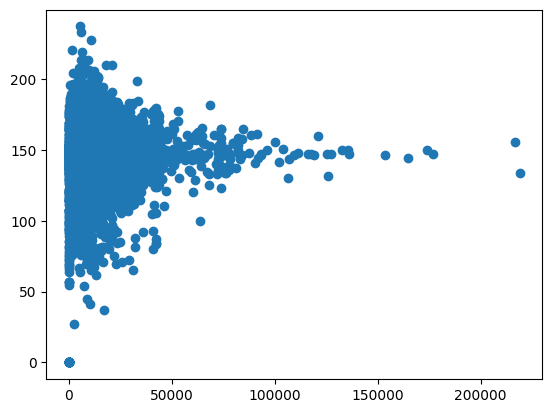

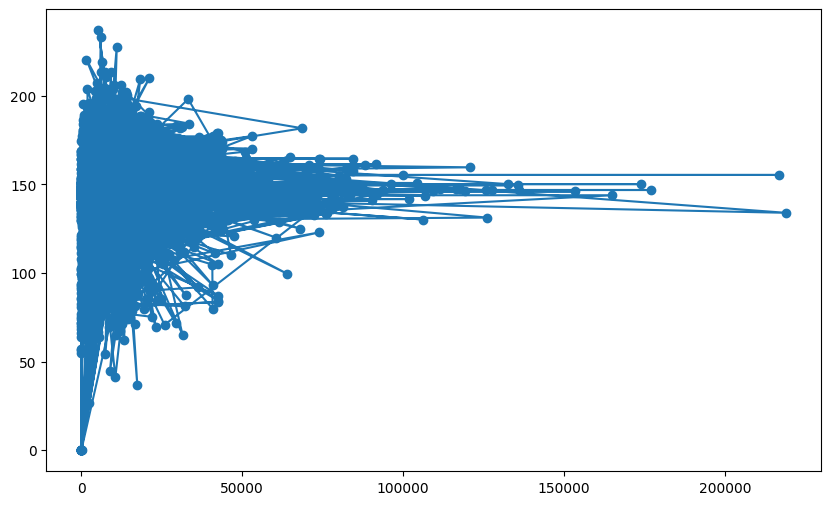

In [17]:
# Visuals

# Creating a scatter plot

plt.scatter(df['distance (m)'], df['average heart rate (bpm)'])

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['distance (m)'], df['average heart rate (bpm)'], marker='o', linestyle='-')

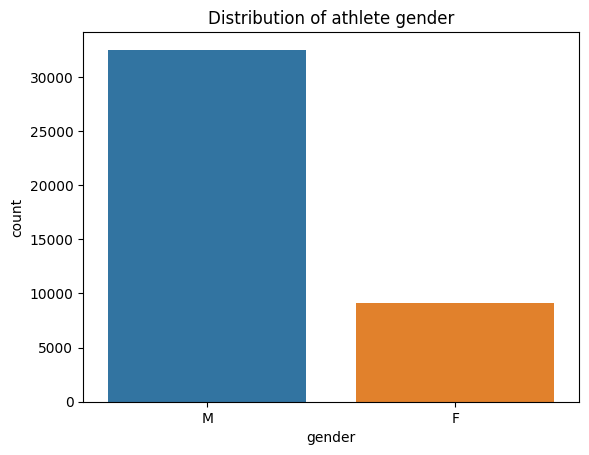

In [19]:
# Distribution of athlete gender

sns.countplot(data = df, x = 'gender')
plt.title('Distribution of athlete gender')
plt.show()

<Axes: >

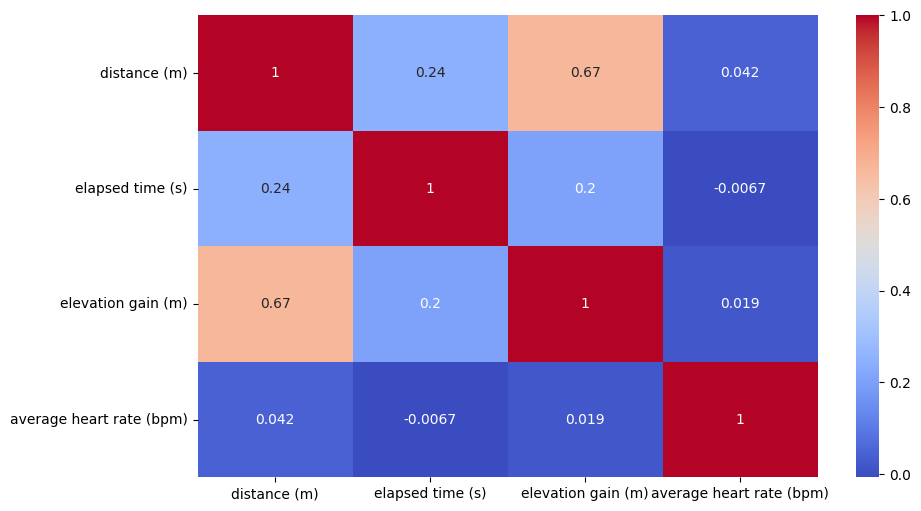

In [23]:
# Corelation Heatmap

for_corr= df.drop(columns = 'athlete')
plt.figure(figsize=(10,6))
corr_matrix = for_corr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [13]:
# Drop duplicates based on 'runner_id' and 'timestamp' columns

df = df.drop_duplicates(subset=['athlete', 'timestamp'])

# The resulting DataFrame (df) will have duplicates removed based on both columns


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   athlete                   41644 non-null  int64         
 1   gender                    41644 non-null  object        
 2   timestamp                 41644 non-null  datetime64[ns]
 3   distance (m)              41644 non-null  float64       
 4   elapsed time (s)          41644 non-null  int64         
 5   elevation gain (m)        41644 non-null  float64       
 6   average heart rate (bpm)  41644 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.5+ MB


## Grouping Athletes to understand their frequency of runs in a week and categorising them as High, Low and Medium

In [15]:
# Convert timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])


# Group by athlete and week, then count runs
weekly_run_count = df.groupby([df['athlete'], df['timestamp'].dt.strftime('%U')])['timestamp'].count().reset_index()
weekly_run_count.columns = ['athlete', 'week', 'runs_per_week']

ValueError: ignored